In [1]:
import statistics
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="white", font_scale=0.9)

In [3]:
df_vote_average = pd.read_csv("/Users/iris/Desktop/GR5291Group8-master/Data/cleaned_movie_data_vote_average.csv")

In [4]:
Y_vote_average = df_vote_average[df_vote_average.columns[0]]
X_vote_average = df_vote_average[df_vote_average.columns[1:len(Y_vote_average)+1]]

In [5]:
# split data into training data 75%, test data 25%
seed = 123
test_size = 0.25
X_vote_average_train, X_vote_average_test, y_vote_average_train, y_vote_average_test = train_test_split(X_vote_average, Y_vote_average, test_size=test_size, random_state=seed)

In [17]:
# tune parameter
param_grid = {"n_estimators": [50, 100, 150, 200],
    "max_depth": [3, 5, 7, 9, 11],
    #"max_features": [5, 7, 10, 13],
    #"min_samples_split": [2, 5, 10],
    #"min_samples_leaf": [1, 3, 10],
    #"bootstrap": [True, False]
             }

model = RandomForestRegressor(random_state=0)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring="neg_mean_squared_error", cv=5, n_jobs=-1)
grid.fit(X_vote_average_train, y_vote_average_train)

print(grid.best_score_)
print(grid.best_params_)

-0.353760628601
{'max_depth': 11, 'n_estimators': 200}


In [18]:
print("Best: %f using %s" % (grid.best_score_, grid.best_params_))

Best: -0.353761 using {'max_depth': 11, 'n_estimators': 200}


-0.453597 (0.014611) with: {'max_depth': 3, 'n_estimators': 50}
-0.452029 (0.016990) with: {'max_depth': 3, 'n_estimators': 100}
-0.450673 (0.016957) with: {'max_depth': 3, 'n_estimators': 150}
-0.450750 (0.017135) with: {'max_depth': 3, 'n_estimators': 200}
-0.397946 (0.012634) with: {'max_depth': 5, 'n_estimators': 50}
-0.396291 (0.012666) with: {'max_depth': 5, 'n_estimators': 100}
-0.395343 (0.011765) with: {'max_depth': 5, 'n_estimators': 150}
-0.395526 (0.011929) with: {'max_depth': 5, 'n_estimators': 200}
-0.371780 (0.010418) with: {'max_depth': 7, 'n_estimators': 50}
-0.369766 (0.009269) with: {'max_depth': 7, 'n_estimators': 100}
-0.368442 (0.008076) with: {'max_depth': 7, 'n_estimators': 150}
-0.368023 (0.008972) with: {'max_depth': 7, 'n_estimators': 200}
-0.363160 (0.009731) with: {'max_depth': 9, 'n_estimators': 50}
-0.359624 (0.009187) with: {'max_depth': 9, 'n_estimators': 100}
-0.357874 (0.008017) with: {'max_depth': 9, 'n_estimators': 150}
-0.357548 (0.008452) with: {'

Text(0,0.5,'MSE')

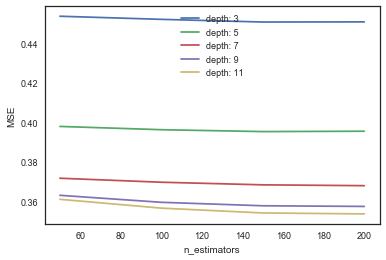

In [19]:
means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
params = grid.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))
# plot results
scores = np.array(means).reshape(len(max_depth), len(n_estimators))
for i, value in enumerate(max_depth):
    plt.plot(n_estimators, scores[i]*(-1), label='depth: ' + str(value))
plt.legend()
plt.xlabel('n_estimators')
plt.ylabel('MSE')

In [20]:
#fit best model
best_model = RandomForestRegressor(max_depth=11, n_estimators=200)

In [21]:
# training error of best model(MAPE)
best_model.fit(X_vote_average_train, y_vote_average_train)
y_vote_average_pred_train = best_model.predict(X_vote_average_train)
statistics.mean(abs((y_vote_average_pred_train-y_vote_average_train)/y_vote_average_train))

0.047174022691246126

In [24]:
# test error of best model(MAPE)
best_model.fit(X_vote_average_train, y_vote_average_train)
y_vote_average_pred = best_model.predict(X_vote_average_test)
statistics.mean(abs((y_vote_average_pred-y_vote_average_test)/y_vote_average_test))

0.08200658526562131

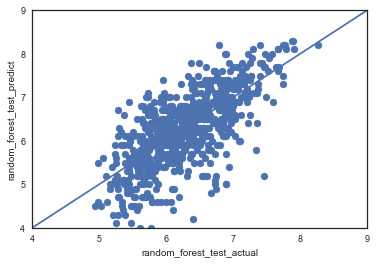

In [26]:
#plot the predicted values against the actual values
plt.scatter(x=y_vote_average_pred, y=y_vote_average_test)
plt.xlim([4,9])
plt.ylim([4,9])
plt.plot([4,9],[4,9])
plt.xlabel('random_forest_test_actual')
plt.ylabel('random_forest_test_predict')
plt.show()

In [27]:
# Interpreting the model
feature_import = pd.DataFrame(data=best_model.feature_importances_, index=X_vote_average.columns.values, columns=['values'])
feature_import.sort_values(['values'], ascending=False, inplace=True)
feature_import.transpose()

,vote_count,runtime,year,Drama,month,minority_studios,Action,majority_studios,Documentary,Science.Fiction,...,History,L32,L53,L14,L27,L10,L50,L6,L54,Foreign
values,0.311287,0.185883,0.135936,0.114448,0.037169,0.029873,0.016711,0.014018,0.012749,0.011242,...,0.00181,0.001418,0.001155,0.000737,0.000635,0.000356,0.000278,0.000277,0.000222,0.000143


In [28]:
feature_import.iloc[0:15,:]

,values
vote_count,0.311287
runtime,0.185883
year,0.135936
Drama,0.114448
month,0.037169
minority_studios,0.029873
Action,0.016711
majority_studios,0.014018
Documentary,0.012749
Science.Fiction,0.011242


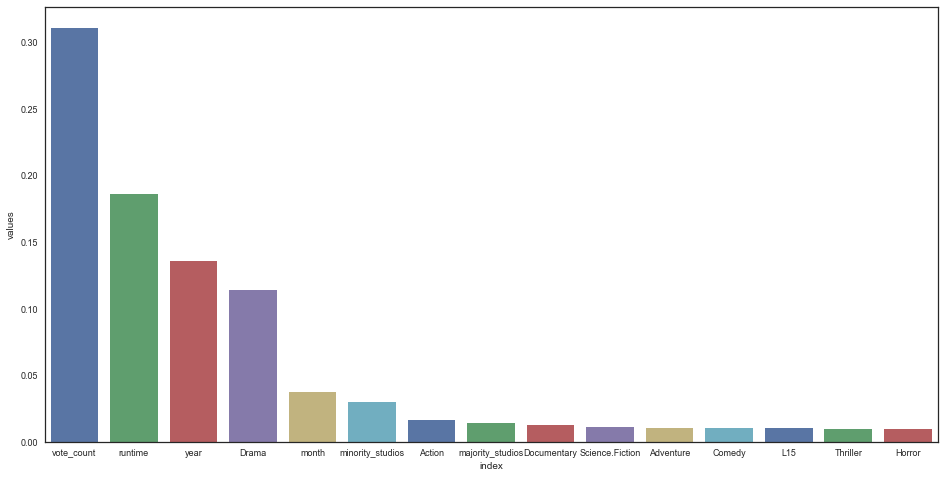

In [29]:
plt.figure(figsize=(16,8))
feature_import=feature_import.iloc[0:15,:]
feature_import.reset_index(level=0, inplace=True)
sns.barplot(x='index', y='values', data=feature_import, palette='deep')
plt.show()